In [1]:
# Predictive Model For Determining Whether a Person Should be Granted a Loan or not


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#check for nullvalues
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.LoanAmount=data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())

In [8]:
data.Credit_History=data.Credit_History.fillna(data.Credit_History.median())

In [9]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data.shape

(542, 13)

C:\Users\lekhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lekhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lekhy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lekhy\anaconda3\lib\si

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

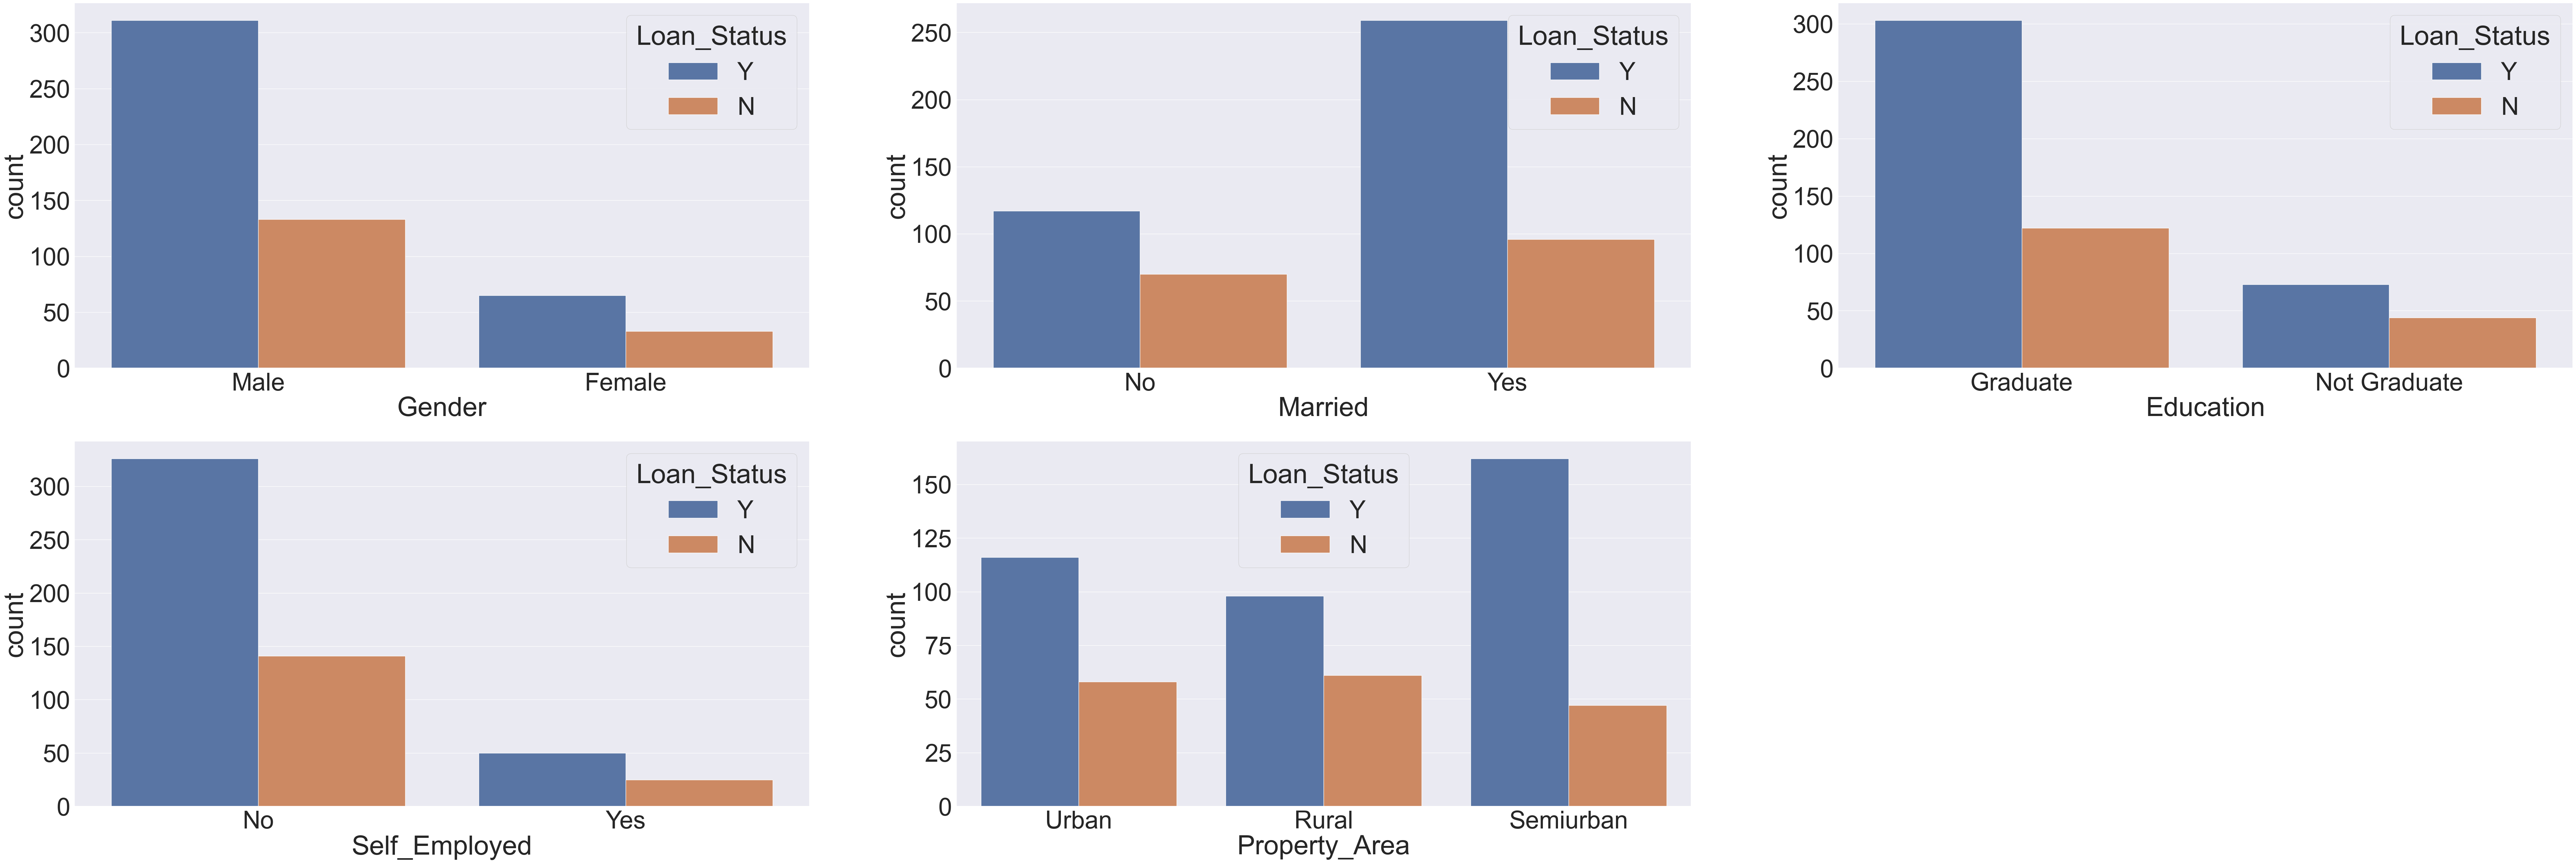

In [13]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(data.Gender,hue=data.Loan_Status)

plt.subplot(332)
sns.countplot(data.Married,hue=data.Loan_Status)

plt.subplot(333)
sns.countplot(data.Education,hue=data.Loan_Status)

plt.subplot(334)
sns.countplot(data.Self_Employed,hue=data.Loan_Status)

plt.subplot(335)
sns.countplot(data.Property_Area,hue=data.Loan_Status)

In [14]:
data.Loan_Status.replace('Y',1,inplace=True)
data.Loan_Status.replace('N',0,inplace=True)

In [15]:
data.Loan_Status.value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [16]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [17]:
data.Married=data.Married.map({'Yes':1,'No':0})
data.Married.value_counts()

1    355
0    187
Name: Married, dtype: int64

In [18]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [19]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    425
0    117
Name: Education, dtype: int64

In [20]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [21]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
data.Property_Area.value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [22]:
data.LoanAmount.value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [23]:
data.Credit_History.value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [24]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
x=data.iloc[1:542,1:12].values
y=data.iloc[1:542,12].values

In [27]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
model=LogisticRegression()
model.fit(x1,y1)

C:\Users\lekhy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
new=[[1002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0]]
model.predict(new)

array([1], dtype=int64)

In [30]:
model.score(x2,y2)*100

78.52760736196319

<AxesSubplot:xlabel='Gender', ylabel='Education'>

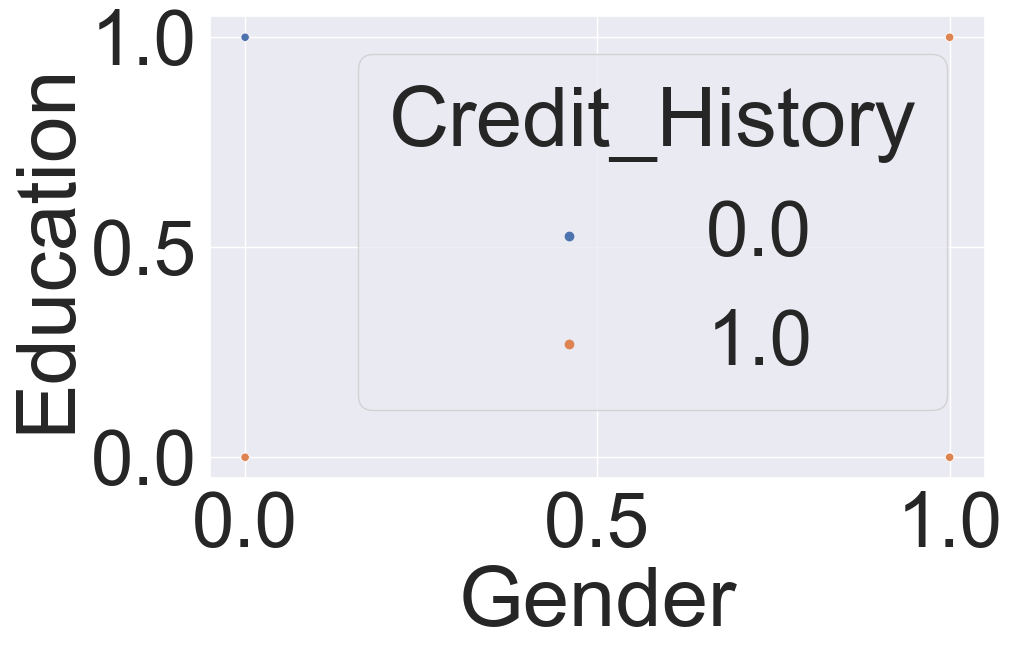

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot( x= 'Gender', y = 'Education',data= data,hue='Credit_History')

In [32]:
data.st_purch.value_counts()

AttributeError: 'DataFrame' object has no attribute 'st_purch'

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

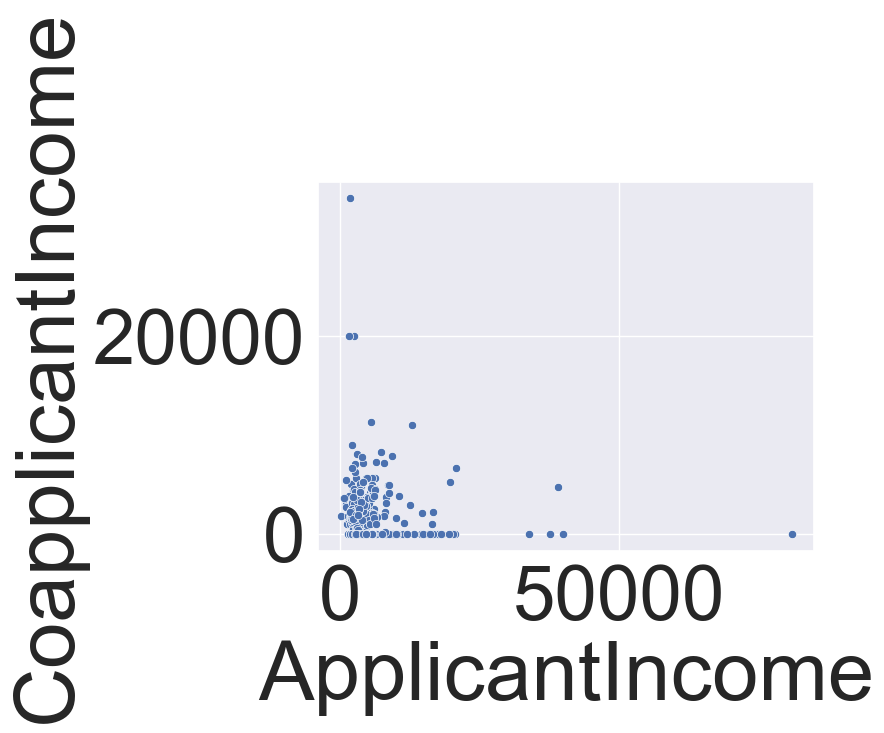

In [33]:
sns.scatterplot(data= data , x= data["ApplicantIncome"] , y = data["CoapplicantIncome"])

sns.boxplot(data["ApplicantIncome"])

In [ ]:
sns.barplot(data= data , x= data["Education"] , y = data["Loan_Amount_Term"])

In [ ]:
import seaborn as sns
sns.barplot(data= data , x= data['Education'] , y = data['Loan_Amount_Term'])

<AxesSubplot:xlabel='Education', ylabel='Loan_Amount_Term'>

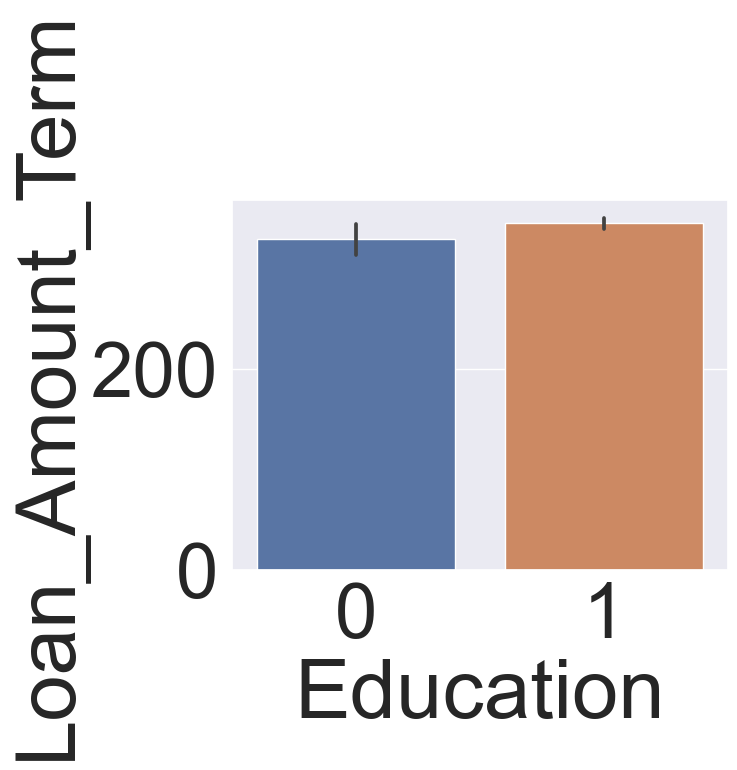

In [34]:
sns.barplot(data= data , x= data['Education'] , y = data['Loan_Amount_Term'])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

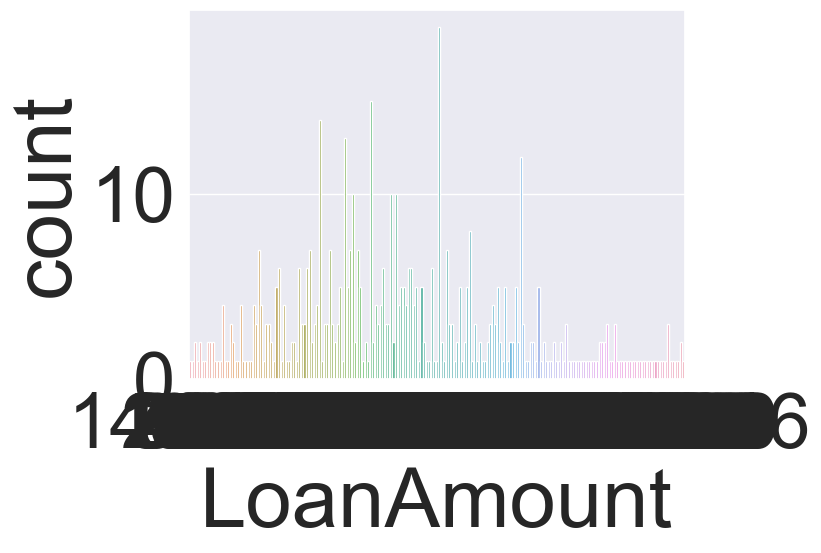

In [35]:
sns.countplot(data= data , x= "LoanAmount")

C:\Users\lekhy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Married', ylabel='Density'>

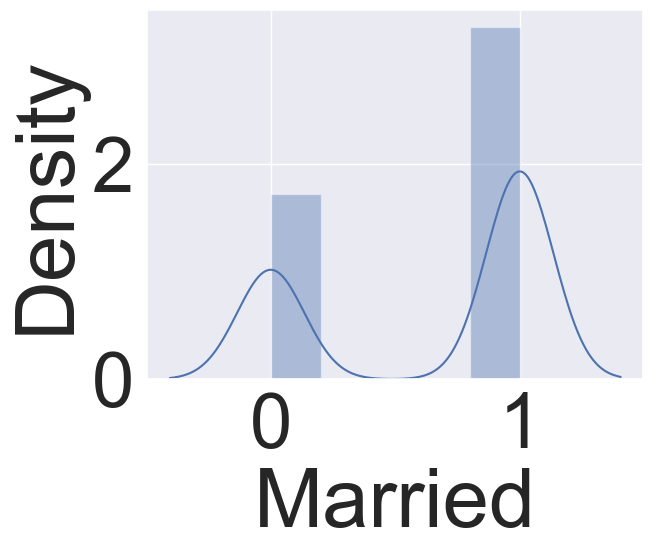

In [36]:
sns.distplot(data["Married"])